In [25]:
import numpy as np
import pandas as pd
import joblib
import math
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
# The selected 4 Venues are Ylläs, Himos, Serena and Ruka
train_venues = [
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Yllas_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Himos_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Serena_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Ruka_final.csv"
]
train_dfs = [pd.read_csv(f) for f in train_venues]
df_train = pd.concat(train_dfs, ignore_index=True)
 
# The selected Venue for testing is Tahko
test_venue = "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Tahko_final.csv"
df_test = pd.read_csv(test_venue)
 
df_train.shape, df_test.shape

((29587, 8), (7305, 8))

In [16]:
print(df_train.isna().sum())

df_train.ffill(inplace = True)

print(df_train.isna().sum())

Date                                    0
Precipitation amount [mm]              27
Snow depth [cm]                       135
Average temperature [°C]                5
cloud_cover_code                        4
Direct solar radiation mean [W/m2]    718
days_above_10cm                         0
days_above_20cm                         0
dtype: int64
Date                                  0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
cloud_cover_code                      0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
dtype: int64


In [17]:
print(df_test.isna().sum())

df_test.ffill(inplace = True)

print(df_test.isna().sum())

Date                                    0
cloud_cover_code                        1
Precipitation amount [mm]              22
Snow depth [cm]                         1
Average temperature [°C]               22
Direct solar radiation mean [W/m2]    179
days_above_10cm                         0
days_above_20cm                         0
dtype: int64
Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
dtype: int64


In [18]:
features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

In [5]:
# Polynomial Model
poly_degree = 3
model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
 
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 10.536765826234115
R²: 0.4546694207494334


In [6]:
# Save the trained model
joblib.dump(model, "polynomial_regression_snow_model.pkl")
 
# Load the model later for predictions
weather_model = joblib.load("polynomial_regression_snow_model.pkl")

In [7]:
remaining_venues = [
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Lahti_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Vuokatti_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Mustavaara_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Pyhatunturi_final.csv"
]

remaining_df = [pd.read_csv(f) for f in remaining_venues]
df_remaining = pd.concat(remaining_df, ignore_index=True)
 
df_remaining.ffill(inplace=True)
df_remaining.bfill(inplace=True)


# Predict snow depth for these Venues
df_remaining["Predicted Snow Depth [cm]"] = weather_model.predict(df_remaining[features])

df_remaining.to_csv("predicted_snow_conditions.csv", index=False)
df_remaining.sample(10)

,Date,cloud_cover_code,Precipitation amount [mm],Snow depth [cm],Average temperature [°C],Direct solar radiation mean [W/m2],days_above_10cm,days_above_20cm,Predicted Snow Depth [cm]
9827,2011-11-29,0.0,1.7,0.0,-3.3,3.2,0,0,18.640405
3457,2014-06-21,8.0,9.0,-1.0,7.2,0.6,0,0,3.883145
2707,2012-06-01,7.0,8.1,-1.0,10.7,78.4,0,0,0.445085
26751,2018-03-27,5.0,0.2,80.0,-8.1,292.2,134,124,50.716378
18906,2016-10-06,0.0,-1.0,-1.0,0.2,131.2,0,0,16.896717
24819,2012-12-12,7.0,1.0,35.0,-8.4,1.3,43,16,32.635989
3185,2013-09-22,7.0,5.3,-1.0,9.6,31.6,0,0,1.200246
23384,2009-01-08,7.0,1.6,39.0,-13.4,1.8,51,46,40.799682
6810,2023-08-26,8.0,-1.0,-1.0,16.4,17.8,0,0,-4.872282
8415,2008-01-17,8.0,1.0,7.0,1.4,1.5,0,0,13.695204


In [8]:
df_remaining.isna().sum()

Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
Predicted Snow Depth [cm]             0
dtype: int64

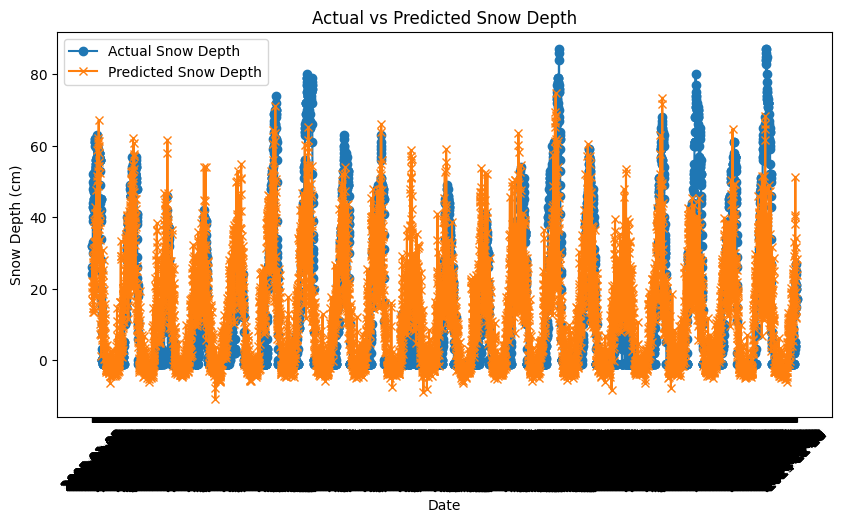

In [ ]:
# Plot actual vs predicted snow depth
plt.figure(figsize=(10, 5))
plt.plot(df_test["Date"], y_test, label="Actual Snow Depth", marker='o')
plt.plot(df_test["Date"], y_pred, label="Predicted Snow Depth", marker='x')
 
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Actual vs Predicted Snow Depth")
plt.legend()
plt.xticks(rotation=45)

In [9]:
# All metrics for our best Model, the Polynomial one
 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
 
print(f"Mean Absolute Error (MAE): {mae:.2f} cm")
print(f"Mean Squared Error (MSE): {mse:.2f} cm²")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} cm")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 10.54 cm
Mean Squared Error (MSE): 236.56 cm²
Root Mean Squared Error (RMSE): 15.38 cm
R² Score: 0.455


Testing the model on the venues that were not used for training and testing

In [25]:
#not used for training
df_lahti = pd.read_csv("https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Lahti_final.csv")
df_vuokatti = pd.read_csv("https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Vuokatti_final.csv")
df_mustavaara = pd.read_csv("https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Mustavaara_final.csv")
df_pyhätunturi = pd.read_csv("https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Pyhatunturi_final.csv")
#used for training
df_ylläs = pd.read_csv("https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Yllas_final.csv")
df_himos = pd.read_csv("https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Himos_final.csv")
df_serena = pd.read_csv("https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Serena_final.csv")
df_ruka = pd.read_csv("https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Ruka_final.csv")
df_tahko = pd.read_csv('https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Tahko_final.csv')



In [26]:
dfs_remaining = [df_lahti, df_vuokatti, df_mustavaara, df_pyhätunturi]
dfs_training = [df_ylläs, df_himos, df_serena, df_ruka, df_tahko]
name_remaining = ['Lahti' ,'Vuokatti', 'Mustavaara', 'Pyhätunturi'] 
name_training = [ 'Ylläs','Himos' ,'Serena', 'Ruka', 'Tahko'] 

# Fill missing values
for df in dfs_remaining:
    df.ffill(inplace=True)
    df.bfill(inplace=True)
    df["Predicted Snow Depth [cm]"] = weather_model.predict(df[features])

# Fill missing values
for df in dfs_training:
    df.ffill(inplace=True)
    df.bfill(inplace=True)
    df["Predicted Snow Depth [cm]"] = weather_model.predict(df[features])


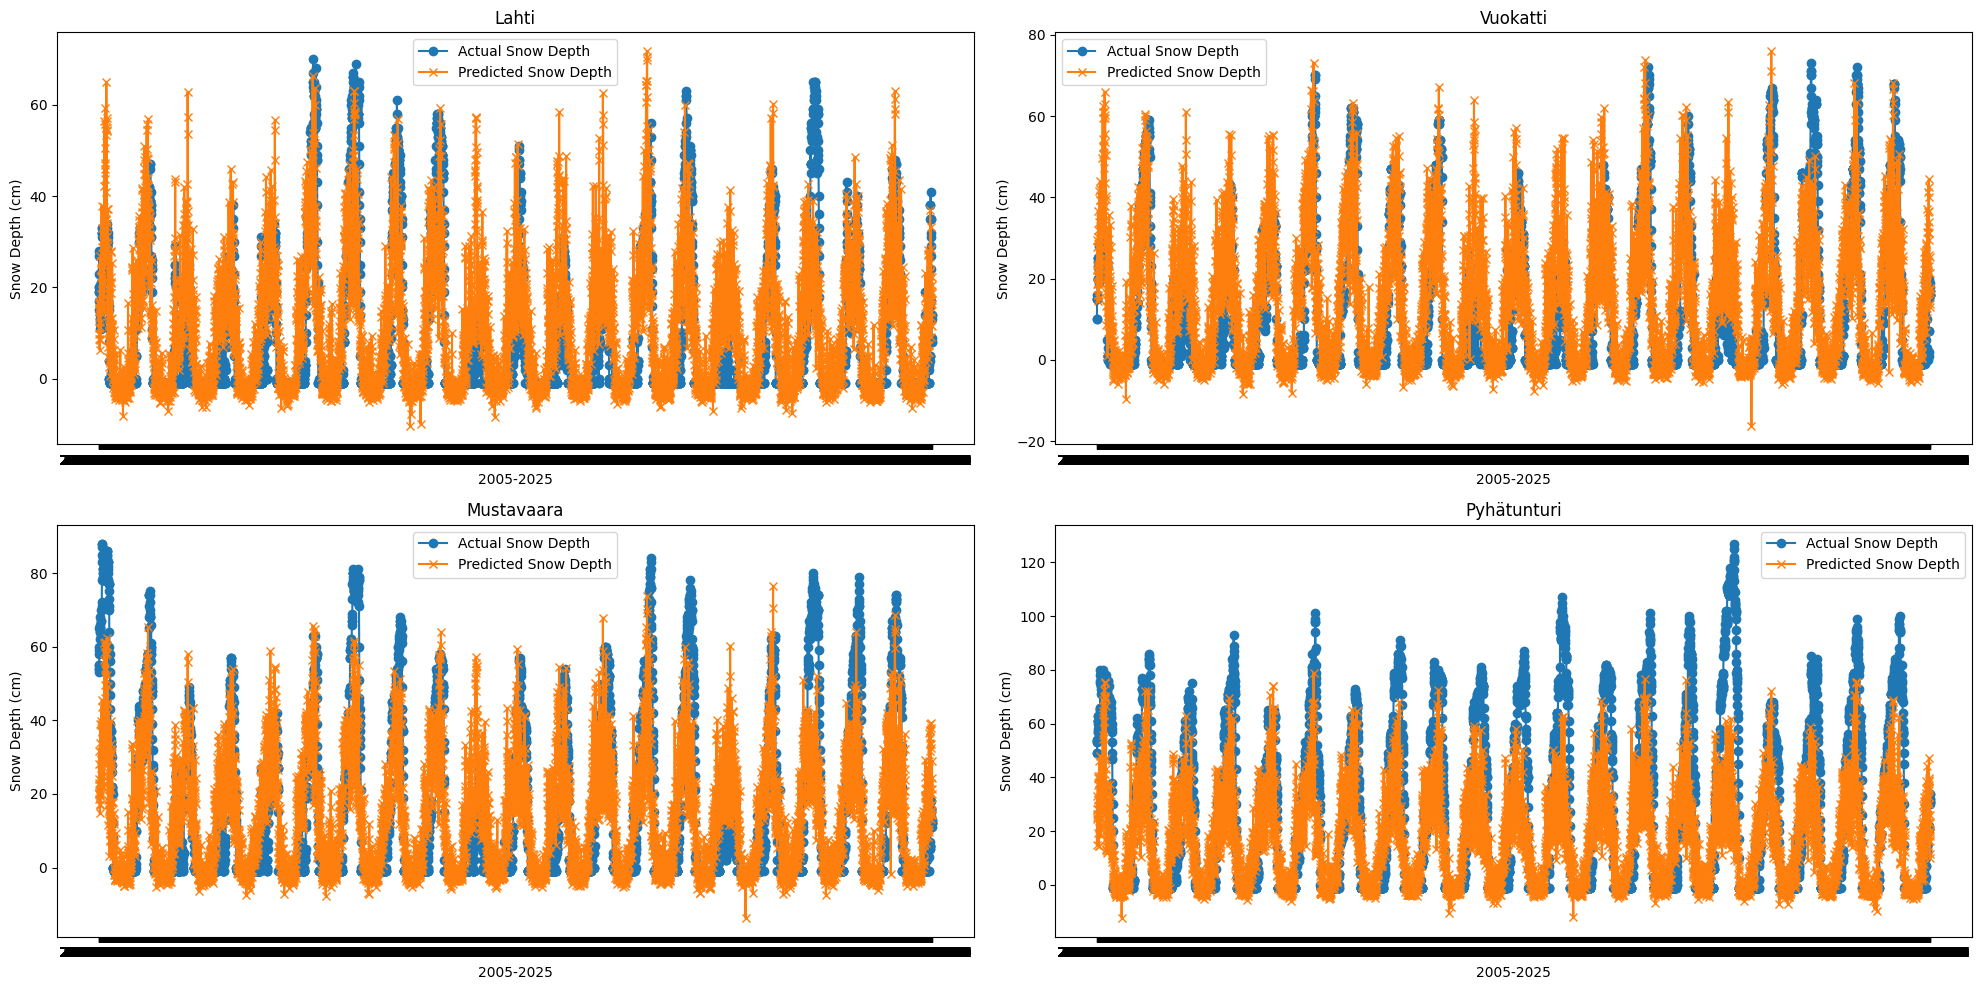

In [27]:
plt.figure(figsize=(20, 10))
i = 1
for df in dfs_remaining:
    plt.subplot(2, 2, i)  # (rows, columns, index)
    plt.plot(df["Date"], df['Snow depth [cm]'], label="Actual Snow Depth", marker='o')
    plt.plot(df["Date"], df['Predicted Snow Depth [cm]'], label="Predicted Snow Depth", marker='x')
    plt.xlabel("2005-2025")
    plt.ylabel("Snow Depth (cm)")
    plt.title(name_remaining[i-1])
    plt.legend()
    i += 1
plt.tight_layout()
plt.show()

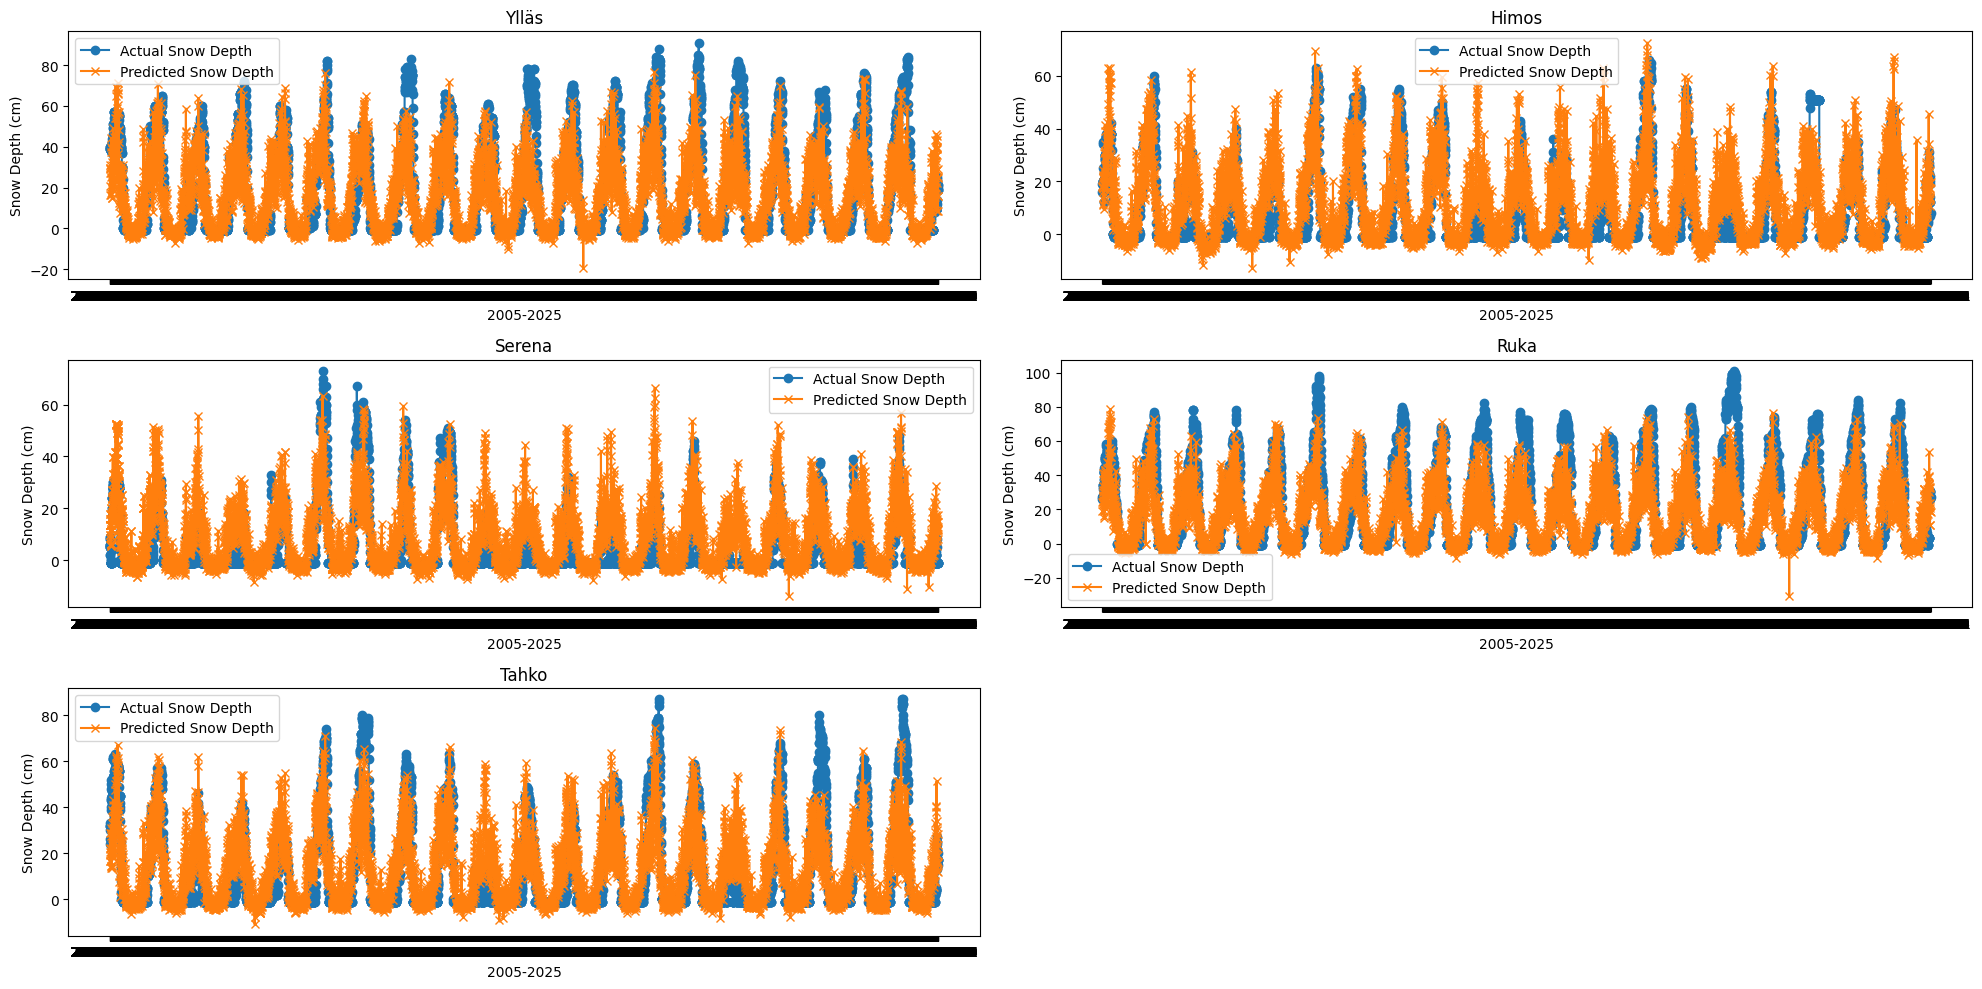

In [28]:
plt.figure(figsize=(20, 10))
i = 1
for df in dfs_training:
    plt.subplot(3, 2, i)  # (rows, columns, index)
    plt.plot(df["Date"], df['Snow depth [cm]'], label="Actual Snow Depth", marker='o')
    plt.plot(df["Date"], df['Predicted Snow Depth [cm]'], label="Predicted Snow Depth", marker='x')
    plt.xlabel("2005-2025")
    plt.ylabel("Snow Depth (cm)")
    plt.title(name_training[i-1])
    plt.legend()
    i += 1
plt.tight_layout()
plt.show()

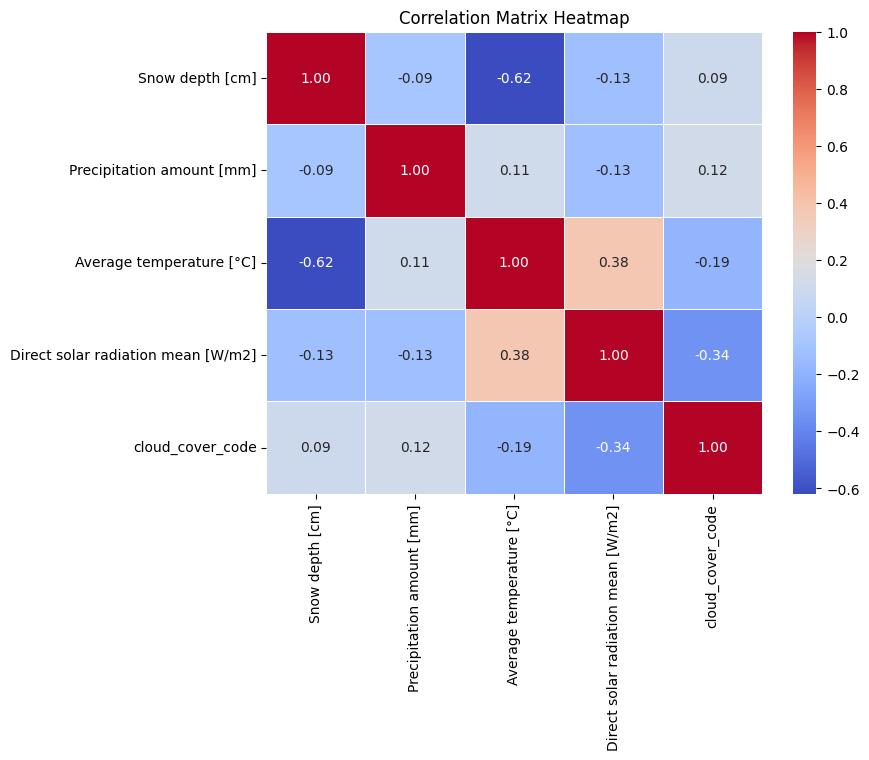

In [31]:
import seaborn as sns
selected_columns = ['Snow depth [cm]', 'Precipitation amount [mm]', 'Average temperature [°C]','Direct solar radiation mean [W/m2]','cloud_cover_code']
correlation_matrix = df_remaining[selected_columns].corr()
plt.figure(figsize=(8, 6))  # Size of the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adding title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

Looking at the prediction errors

In [32]:
df_test["Prediction Error"] = abs(y_test - y_pred)
df_test_sorted = df_test.sort_values("Prediction Error", ascending=False)
 
print(df_test_sorted[["Date", "Snow depth [cm]", "Prediction Error"]].head(10))
print(df_test_sorted[["Date", "Snow depth [cm]", "Prediction Error"]].tail(10))

            Date  Snow depth [cm]  Prediction Error
4841  2018-04-05             84.0         72.336748
6993  2024-02-25             85.0         72.150908
6991  2024-02-23             85.0         70.498069
6990  2024-02-22             87.0         69.722229
6992  2024-02-24             80.0         65.661413
6994  2024-02-26             78.0         65.344190
2281  2011-04-02             76.0         65.036143
4842  2018-04-06             75.0         64.198215
6988  2024-02-20             84.0         63.711868
2280  2011-04-01             77.0         62.692152
            Date  Snow depth [cm]  Prediction Error
6703  2023-05-11             -1.0          0.012098
5367  2019-09-13             -1.0          0.011916
2685  2012-05-10             -1.0          0.009639
6018  2021-06-25             -1.0          0.008329
2049  2010-08-13             -1.0          0.008201
3801  2015-05-31             -1.0          0.006677
1717  2009-09-15             -1.0          0.006474
7222  2024-1

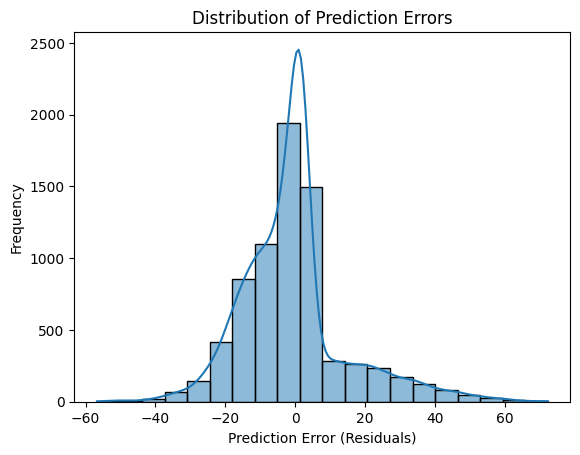

In [33]:
import seaborn as sns
 
residuals = y_test - y_pred  # Difference between actual and predicted

sns.histplot(residuals, bins=20, kde=True)

plt.xlabel("Prediction Error (Residuals)")

plt.ylabel("Frequency")

plt.title("Distribution of Prediction Errors")

plt.show()
 

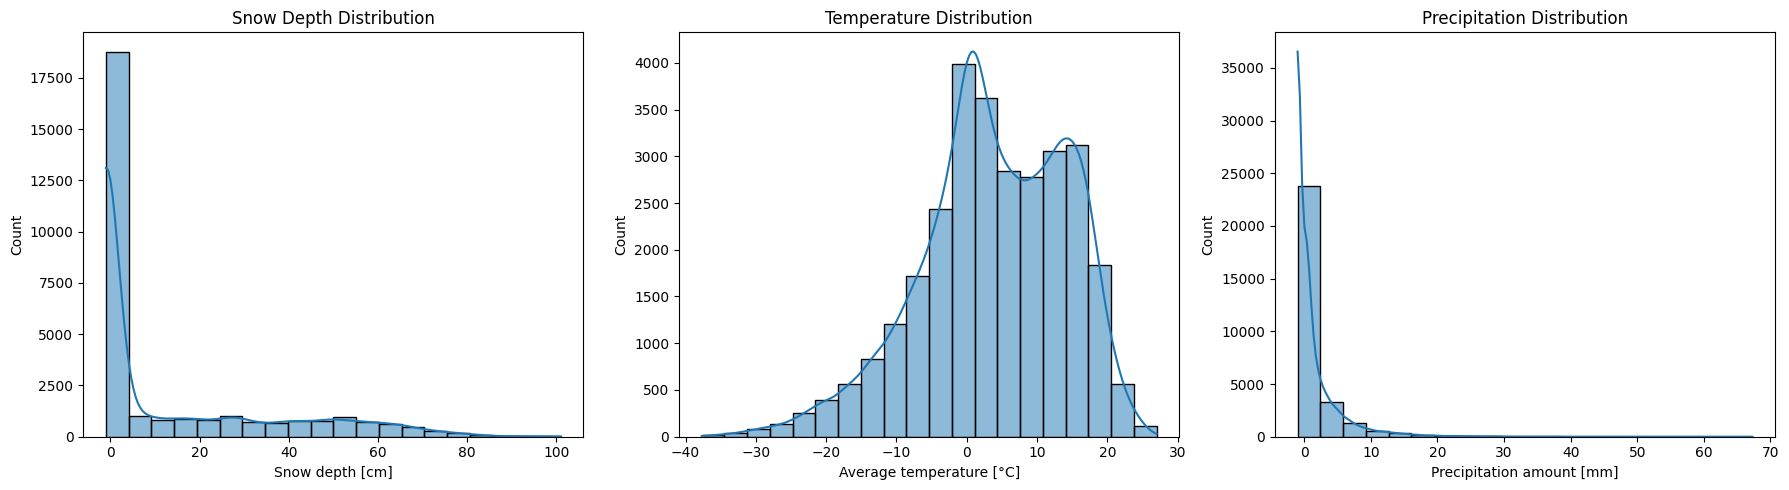

In [34]:
# Visualize distribution of snow depth, temperature, and precipitation
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Snow Depth
sns.histplot(df_train["Snow depth [cm]"], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Snow Depth Distribution")

# Temperature
sns.histplot(df_train["Average temperature [°C]"], bins=20, kde=True, ax=axes[1])
axes[1].set_title("Temperature Distribution")

# Precipitation
sns.histplot(df_train["Precipitation amount [mm]"], bins=20, kde=True, ax=axes[2])
axes[2].set_title("Precipitation Distribution")

plt.tight_layout()
plt.show()

In [ ]:
# Winter is Coming, but it's less effective
df_train["Date"] = pd.to_datetime(df_train["Date"])
winter_months = [9, 10, 11, 12, 1, 2, 3, 4, 5]
df_train = df_train[df_train["Date"].dt.month.isin(winter_months)]

X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

# Polynomial Model
poly_degree = 3
model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
 
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 11.211707405029005
R²: 0.43067001456933063


In [20]:
# Linear Regression Model (less effective than the Polynomial)
new_model = LinearRegression()
new_model.fit(X_train, y_train)

y_pred = new_model.predict(X_test)

new_mae = mean_absolute_error(y_test, y_pred)
new_r2 = r2_score(y_test, y_pred)
print(f"MAE: {new_mae}")
print(f"R²: {new_r2}")

MAE: 12.19804952971378
R²: 0.3925303653001907


In [24]:
# Random Forest Regression Model (less effective than the Polynomial)
from sklearn.ensemble import RandomForestRegressor

features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]
 
model = RandomForestRegressor(n_estimators=400, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 9.183028470253035
R²: 0.4427865347914872


## Forecast Snowdepth Predictions ```2025 to 2050```

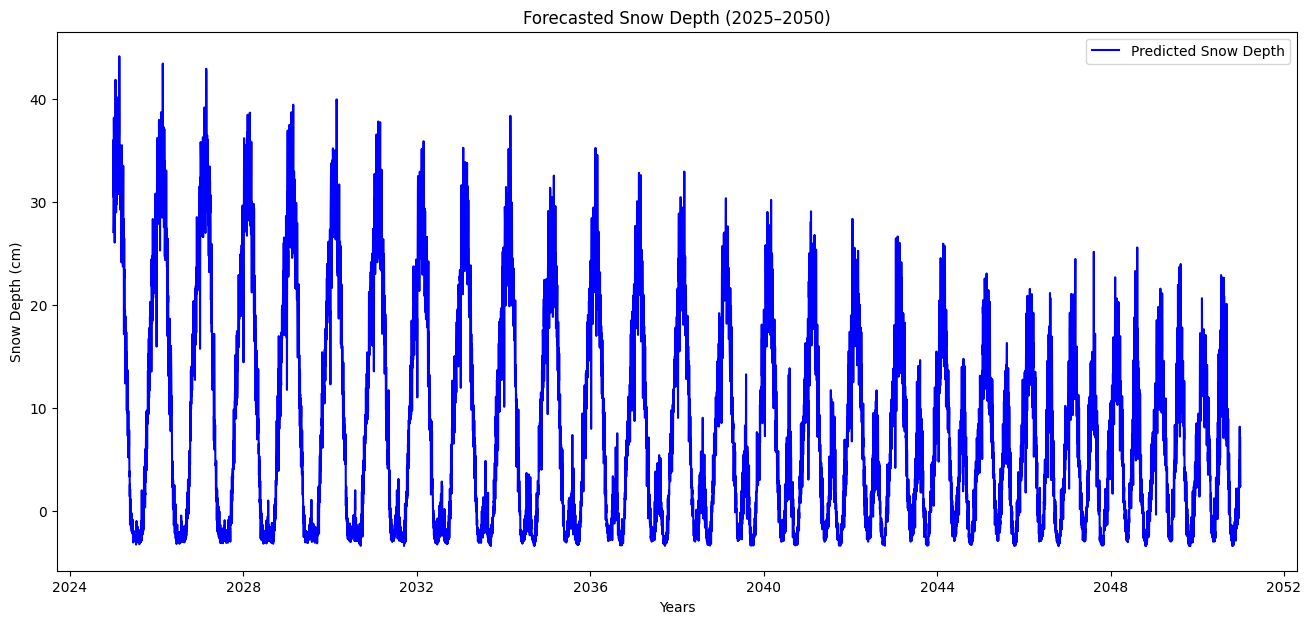

In [18]:
df_train["Date"] = pd.to_datetime(df_train["Date"])

future_dates = pd.date_range(start="2025-01-01", end="2050-12-31", freq="D")
seasonal_means = df_train.groupby(df_train["Date"].dt.dayofyear)[features].mean()

num_years = (2050 - 2025) + 1
num_days = len(future_dates)

seasonal_data_repeated = np.tile(seasonal_means.values, (num_years, 1))
future_X = pd.DataFrame(seasonal_data_repeated[:num_days], columns=features)

# Future long-term trend: +11°C by 2050 and more extreme values sometimes
temperature_trend = np.linspace(0, 11, num_days)
random_variation = np.random.normal(0, 1, num_days)

future_X["Average temperature [°C]"] += temperature_trend + random_variation

future_snow_depth = model.predict(future_X)

future_df = pd.DataFrame({"Date": future_dates, "Predicted Snow Depth [cm]": future_snow_depth})
plt.figure(figsize=(16, 7))
plt.plot(future_df["Date"], future_df["Predicted Snow Depth [cm]"], label="Predicted Snow Depth", color="blue")
plt.xlabel("Years")
plt.ylabel("Snow Depth (cm)")
plt.title("Forecasted Snow Depth (2025–2050)")
plt.legend()

# future_df.to_csv('../Data/forecast_prediction.csv')

# Question: Based on the forecast prediction, will it be some year in the future without two continuous weeks of at least 20 cm of snow, or four continuous weeks of at least 10 cm of snow?

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/forecast_prediction.csv')
# df = pd.read_csv('../Data/forecast_prediction.csv')

df['Date'] = pd.to_datetime(df['Date'])

for year in range(2025, 2051):
    df_year = df[df['Date'].dt.year == year]
    
    snow_20cm = df_year[df_year['Predicted Snow Depth [cm]'] >= 20].copy()
    snow_20cm['date_diff'] = snow_20cm['Date'].diff().dt.days.fillna(1)
    snow_20cm['group'] = (snow_20cm['date_diff'] > 1).cumsum()
    snow_20cm.to_csv('super.csv')
    
    consecutive_20cm = snow_20cm.groupby('group').size()
    result_14_days_20cm = any(consecutive_20cm >= 14)

    snow_10cm = df_year[df_year['Predicted Snow Depth [cm]'] >= 10].copy()
    snow_10cm['date_diff'] = snow_10cm['Date'].diff().dt.days.fillna(1)
    snow_10cm['group'] = (snow_10cm['date_diff'] > 1).cumsum()
    
    consecutive_10cm = snow_10cm.groupby('group').size()
    result_28_days_10cm = any(consecutive_10cm >= 28)
    
    if result_14_days_20cm is False:
        print(f"The year {year} doesn't have two continuous weeks of at least 20cm of snow")
    if result_28_days_10cm is False:
        print(f"The year {year} doesn't have four continuous weeks of at least 10cm of snow")
    if result_14_days_20cm is True and result_28_days_10cm is True:
        pass
    else:
        print()
    # else:
    #     print(f"The year {year} does have two continuous weeks of at least 20cm of snow and four continuous weeks of at least 10cm of snow")

The year 2038 doesn't have two continuous weeks of at least 20cm of snow

The year 2040 doesn't have two continuous weeks of at least 20cm of snow

The year 2041 doesn't have two continuous weeks of at least 20cm of snow

The year 2042 doesn't have two continuous weeks of at least 20cm of snow

The year 2043 doesn't have two continuous weeks of at least 20cm of snow

The year 2044 doesn't have two continuous weeks of at least 20cm of snow

The year 2045 doesn't have two continuous weeks of at least 20cm of snow

The year 2046 doesn't have two continuous weeks of at least 20cm of snow

The year 2047 doesn't have two continuous weeks of at least 20cm of snow

The year 2048 doesn't have two continuous weeks of at least 20cm of snow

The year 2049 doesn't have two continuous weeks of at least 20cm of snow
The year 2049 doesn't have four continuous weeks of at least 10cm of snow

The year 2050 doesn't have two continuous weeks of at least 20cm of snow



# Question: Which month based on the prediction is the most reliable to be sure there is snow for skiing?

In [ ]:
df_remaining['Date'] = pd.to_datetime(df_remaining['Date'])
df_remaining['Year'] = df_remaining['Date'].dt.year
df_remaining['Month'] = df_remaining['Date'].dt.month

monthly_avg_snow_depth = df_remaining.groupby(['Year', 'Month'])['Predicted Snow Depth [cm]'].mean().reset_index()

monthly = monthly_avg_snow_depth.groupby('Month')['Predicted Snow Depth [cm]'].mean()
monthly.sort_values(ascending =False).head(3)

Month
2    32.990932
3    29.732496
1    29.522033
Name: Predicted Snow Depth [cm], dtype: float64